# Parte 1: Classificando resultado de exames

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df['diagnosis_maligno'] = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df['diagnosis_maligno'].value_counts()

0    357
1    212
Name: diagnosis_maligno, dtype: int64

## Separando treino e teste:

In [6]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_maligno'],
      dtype='object')

In [8]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = df['diagnosis_maligno']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [10]:
len(X_train)

460

In [11]:
len(X_test)

57

In [12]:
len(X_val)

52

## Normalizando os dados:

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [16]:
X_train

array([[-0.65891871,  0.50155966, -0.64008845, ..., -0.4254832 ,
        -0.9490687 ,  0.82189771],
       [-0.15046863, -0.70157593, -0.20814857, ..., -0.45017838,
        -0.88492796, -0.21330484],
       [-1.1127894 ,  1.90598909, -1.10448625, ..., -0.3687144 ,
        -1.07265696, -0.07470481],
       ...,
       [ 0.53608261, -0.89361488,  0.56543164, ...,  1.23993568,
         0.16791883,  0.37708831],
       [ 1.61617996,  1.32987224,  1.58910421, ...,  0.86499056,
         0.6153396 ,  0.02306731],
       [ 0.1827529 , -0.39616458,  0.1526336 , ..., -0.49203972,
         1.07684005, -0.61083981]])

## Definição da arquitetura:

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
def build_model():
    model = Sequential()
    model.add(Dense(input_dim = 30, units = 10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


## Compilação:

In [21]:
adam = Adam(lr = 0.01)                      # 'lr' (learning rate): tamanho do passo que a Rede vai dar
model.compile(loss = 'binary_crossentropy', # Como o erro é calculado
              optimizer = adam,             # Define como vai ser a função que estima a direção da rede
              metrics = ['accuracy'])       # Imprime a acurácia de cada passo da rede

## Treinamento:

In [22]:
model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), batch_size = 16, epochs = 15)

Epoch 1/15
29/29 [==============================] - 1s 10ms/step - loss: 0.5809 - accuracy: 0.7457 - val_loss: 0.4203 - val_accuracy: 0.8654
Epoch 2/15
29/29 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8978 - val_loss: 0.3083 - val_accuracy: 0.8846
Epoch 3/15
29/29 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9239 - val_loss: 0.2370 - val_accuracy: 0.9038
Epoch 4/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9522 - val_loss: 0.1881 - val_accuracy: 0.9231
Epoch 5/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9522 - val_loss: 0.1537 - val_accuracy: 0.9615
Epoch 6/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9522 - val_loss: 0.1279 - val_accuracy: 0.9615
Epoch 7/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9587 - val_loss: 0.1069 - val_accuracy: 0.9808
Epoch 8/15
29/29 [=

## Avaliação:

In [23]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_pred

array([[9.8453844e-01],
       [6.8347342e-02],
       [9.6315128e-01],
       [1.1490532e-04],
       [9.8934591e-01],
       [1.9043777e-02],
       [1.1342987e-02],
       [1.0500622e-01],
       [7.5229041e-02],
       [3.1632289e-02],
       [5.5872727e-02],
       [2.6210493e-01],
       [1.3101718e-01],
       [2.0563840e-03],
       [1.7754942e-02],
       [2.6103128e-03],
       [6.1586956e-03],
       [1.3574512e-02],
       [3.5360772e-02],
       [9.1093453e-03],
       [4.4917867e-02],
       [9.0062553e-01],
       [9.9898893e-01],
       [9.9604762e-01],
       [9.6309286e-01],
       [3.0402611e-03],
       [8.0883699e-03],
       [3.1454783e-02],
       [1.4858706e-02],
       [9.9993747e-01],
       [9.9997824e-01],
       [4.9341023e-02],
       [4.9013689e-02],
       [1.3535223e-02],
       [9.9999863e-01],
       [2.4686239e-03],
       [8.5719347e-02],
       [6.6517224e-03],
       [4.7608867e-04],
       [3.5548524e-03],
       [1.0462503e-02],
       [9.979397

In [26]:
cm = confusion_matrix(y_test, y_pred > 0.5)
cm

array([[39,  4],
       [ 0, 14]])

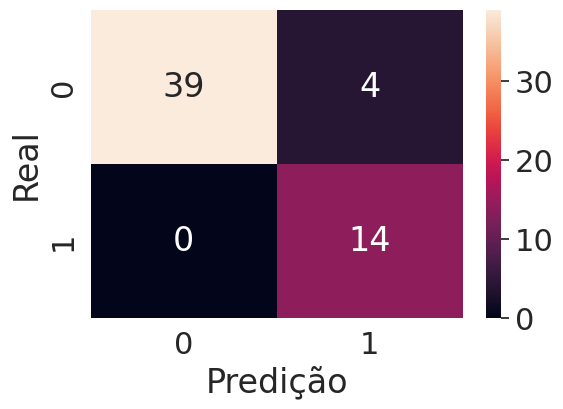

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.set(font_scale = 2)
sns.heatmap(cm, annot =True, fmt = "d").set(xlabel = "Predição", ylabel = "Real");